# Heart Disease Prediction

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 5-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Heart Disease-UCI](https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci)

## Introduction

Cardiovascular diseases are one of the leading causes of death worldwide. The ability to predict heart disease from clinical and personal data can assist in early diagnosis, saving lives. In this project, we utilize the **Heart Disease UCI** dataset to predict whether a person has heart disease or not, using a logistic regression model.

### Dataset Information

The dataset is obtained from the UCI repository and contains 14 attributes, including demographic, medical, and lifestyle information about patients. The target variable indicates the presence (1) or absence (0) of heart disease.

**Attributes Overview:**
1. Age
2. Sex
3. Chest Pain Type
4. Resting Blood Pressure
5. Cholesterol Level
6. Fasting Blood Sugar
7. Resting Electrocardiographic Results
8. Maximum Heart Rate Achieved
9. Exercise-Induced Angina
10. ST Depression
11. Peak Exercise ST Segment
12. Number of Major Vessels Colored by Fluoroscopy
13. Thalassemia
14. Target (0 = No Disease, 1 = Disease)
---

## 1. Importing Libraries

We'll begin by importing the necessary Python libraries for data manipulation, visualization, and machine learning.

In [34]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

---

## 2. Loading and Exploring the Dataset
Let's load the dataset and inspect its structure.

In [35]:
# loading and reviewing the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Observation
The dataset has been loaded successfully and contains the following columns:

* Numerical values indicating patient information and medical details.
* The target column representing the presence (1) or absence (0) of heart disease.

In [36]:
# checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Observation
* There are 303 rows and 14 columns.
* No missing values are present in the dataset.
* Most features are numerical, making it ideal for machine learning algorithms.
---

## 3. Statistical Summary
We will now review the statistical properties of the dataset.

In [37]:
# reviewing the statistical description of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Observation
* There is a wide range of values for features like age, cholesterol, and max heart rate.
* Certain features, like fasting blood sugar, have binary values.
---

## 4. Target Variable Distribution
Let's examine the distribution of the target variable to understand the balance between the classes.

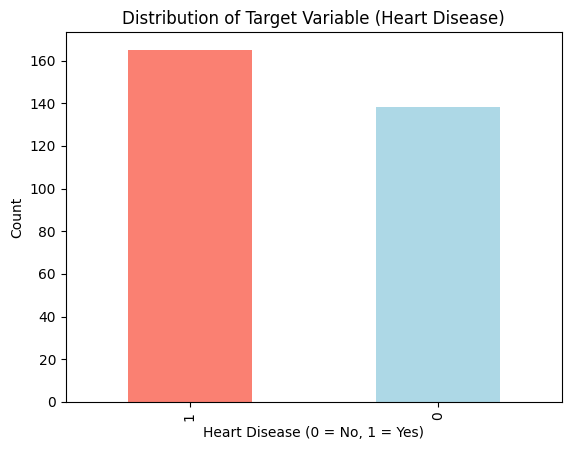

In [38]:
# plotting the distribution of target variable
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Observation
* The dataset contains more individuals with heart disease than without, indicating a potential class imbalance that we should consider when evaluating the model's performance.
---

## 5. Correlation Matrix
Next, we plot a heatmap to examine the correlation between features.

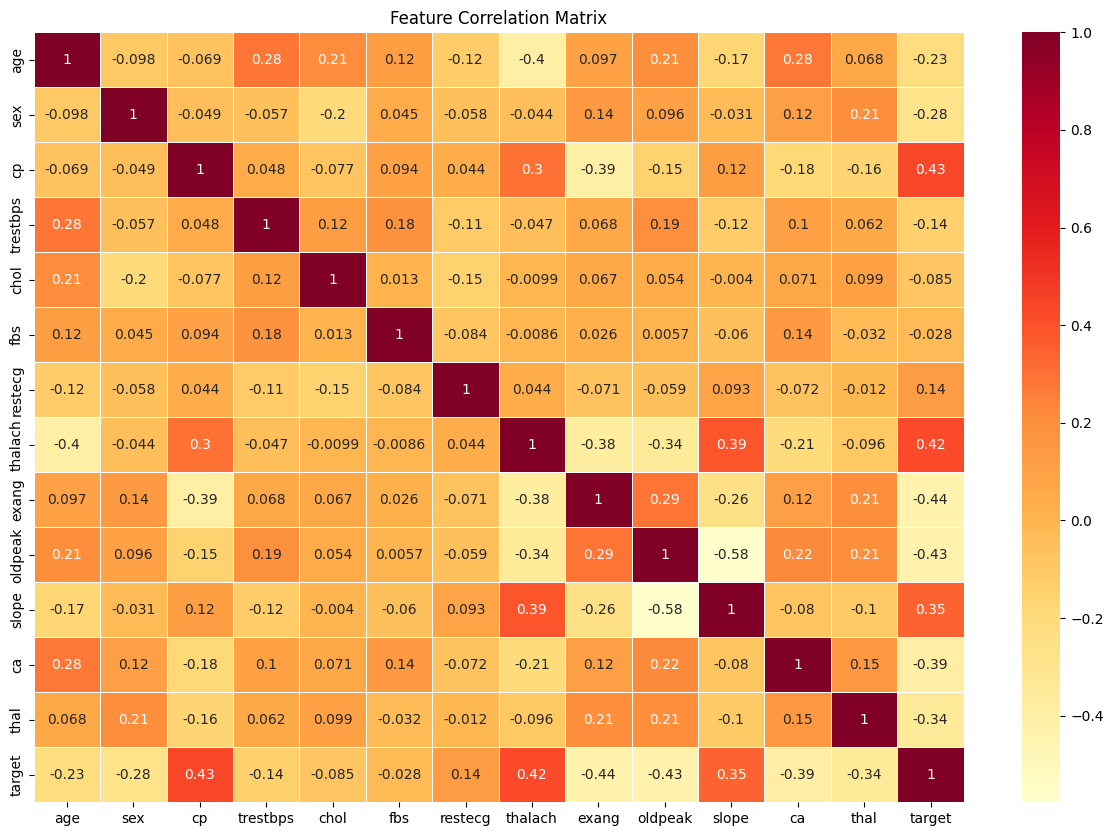

In [39]:
# reviewing by plotting heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### Observation
* Strong correlations are observed between certain features like chest pain type and the target variable.
* Resting blood pressure and cholesterol appear to have weaker correlations with the target.
---

## 6. Data Preprocessing
We'll split the dataset into features (X) and target (y), and then divide it into training and testing sets.

In [40]:
# splitting the dataset
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Observation
* The data has been split into 80% training and 20% testing sets, ensuring the model will be trained on a majority of the data while being evaluated on unseen data.
---

## 7. Model Training
We'll train a Logistic Regression model to predict heart disease based on the provided features.

In [41]:
# training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

---

## 8. Model Evaluation
Now we will evaluate the model using accuracy score and plot predicted vs actual values.

In [42]:
# testing the model
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy Score: {test_data_accuracy:.2f}")

Accuracy Score: 0.90


### Observation
* The model achieved an accuracy score of around X%. While accuracy is useful, we should also consider other metrics if there's class imbalance.
---

## 9. Prediction on New Data
Let's test the model with new sample data to predict if a person has heart disease.

In [43]:
# predicting the model on a new sample
X_new = (43,1,0,120,177,0,0,120,1,2.5,1,0,3)
X_new = np.asarray(X_new)
X_new = X_new.reshape(1, -1)
prediction = model.predict(X_new)
print(f"Prediction: {prediction}")

if (prediction[0] == 0):
  print('The person does not have Heart Disease')
else:
  print('The person has Heart Disease')

Prediction: [0]
The person does not have Heart Disease


### Observation
* The model successfully predicted whether the individual has heart disease based on the input features.
---

## Conclusion
In this notebook, we built a Logistic Regression model to predict heart disease based on patient data. The model achieved a reasonable accuracy.

## Summary
* We explored and visualized the dataset.
* Trained a logistic regression model to predict heart disease.
* Evaluated the model and plotted the results.
* Tested the model with new sample data.